In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Here we generate a plot comparing the average MSE (across experiments) for each acquisition function across active learning iterations

In [ ]:
folder_path = "/content/gdrive/My Drive/FINAL_PAPER_ACTIVE_LEARNING_EXP/5p_Splicing/AL_Results_v3/Exp3_StartSize75_Wd0.025/"
total_itr = 601
#Loading EI Results
ei_1 = np.load(folder_path+"EI_BS1_MSE_Ind1.npy")[0:total_itr]
ei_2 = np.load(folder_path+"EI_BS1_MSE_Ind2.npy")[0:total_itr]
ei_3 = np.load(folder_path + "EI_BS1_MSE_Ind3.npy")[0:total_itr]
ei_all = np.vstack((ei_1, ei_2, ei_3))
ei_avg = np.mean(ei_all, axis=0)
ei_std = np.std(ei_all, axis=0, ddof=1)
print(len(ei_avg))

#Loading MaxVar Results
maxvar_1 = np.load(folder_path+"MaxVar_BS1_MSE_Ind1.npy")[0:total_itr]
maxvar_2 = np.load(folder_path+"MaxVar_BS1_MSE_Ind2.npy")[0:total_itr]
maxvar_3 = np.load(folder_path+"MaxVar_BS1_MSE_Ind3.npy")[0:total_itr]
maxvar_all = np.vstack((maxvar_1, maxvar_2, maxvar_3))
mv_avg = np.mean(maxvar_all, axis=0)
mv_std = np.std(maxvar_all, axis=0, ddof=1)

#Loading Rand Results
rand_1 = np.load(folder_path + "Rand_BS1_MSE_Ind1.npy")[0:total_itr]
rand_2 = np.load(folder_path + "Rand_BS1_MSE_Ind2.npy")[0:total_itr]
rand_3 = np.load(folder_path + "Rand_BS1_MSE_Ind3.npy")[0:total_itr]
rand_all = np.vstack((rand_1, rand_2, rand_3))
rand_avg = np.mean(rand_all, axis=0)
rand_std = np.std(rand_all, axis=0, ddof=1)


601


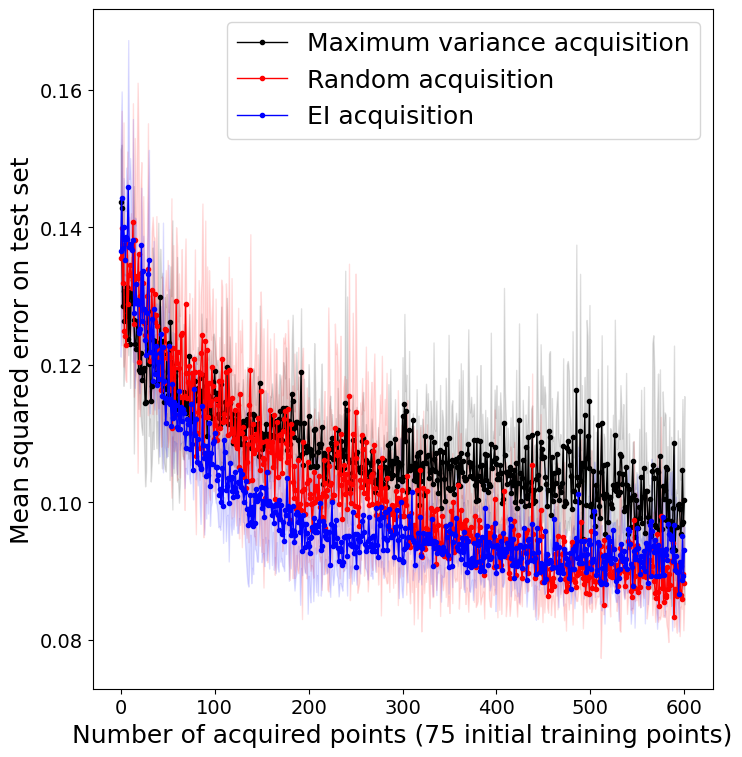

In [ ]:
#Graphing MSE as a function of number of acquired points for each acquisition function
num_batch_acq = len(rand_avg)
Queries = np.arange(0, num_batch_acq, 1)

#Matplotlib font size settings for figure readibility (taken from https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.figure(figsize=(8, 9), dpi=100)

#plt.plot(Queries, ei_avg, marker='o', color='blue', linewidth=1,  label="Expected Improvement Acquisition")
plt.plot(Queries, mv_avg, color="black", linewidth=1.0, marker='.', label="Maximum variance acquisition" )

#plt.errorbar(Queries, rand_avg, yerr=rand_std)
plt.plot(Queries, rand_avg, color="red", linewidth=1.0, marker='.', label="Random acquisition" )

plt.plot(Queries, ei_avg, color="blue", linewidth=1.0, marker='.', label="EI acquisition" )



plt.fill_between(
  Queries,
  mv_avg - mv_std,
  mv_avg + mv_std,
  alpha=0.12,
  color='black',
  interpolate=True)
plt.fill_between(
  Queries,
  rand_avg - rand_std,
  rand_avg + rand_std,
  alpha=0.12,
  color='red',
  interpolate=True)

plt.fill_between(
  Queries,
  ei_avg - ei_std,
  ei_avg + ei_std,
  alpha=0.12,
  color='blue',
  interpolate=True)


plt.xlabel("Number of acquired points (75 initial training points)")
plt.ylabel("Mean squared error on test set")

plt.legend(loc = 1)
plt.show()

#print(np.mean(me_std))
#print(np.mean(ei_std))
#print(np.mean(rand_std))

In [ ]:
#MSE Guessing the mean: 0.14202186522506033